### Distance Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start_date = '2019-12-29'
end_date = '2024-02-09'
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'COST', 'AMGN', 'AVGO', 'TXN', 'QCOM', 'GILD', 'SBUX'
]
price = pd.DataFrame()
for i in tickers :
    price = pd.concat([
        price, 
        yf.download(i, start=start_date, end=end_date)['Close']
    ], axis = 1)
price.columns = tickers
price.index = pd.to_datetime(price.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [2]:
price.dropna(inplace=True)

In [3]:
ret = price.pct_change().dropna()

In [4]:
ret_test = ret['2023-10' :]
ret = ret[: '2023-09']

### 상관계수

Text(0.5, 1.0, 'Correlation')

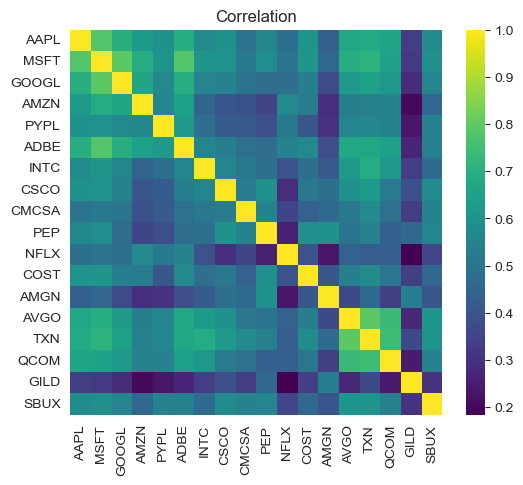

In [5]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    ret.corr(), annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation')

### 상관계수 기반 척도

$$
\begin{matrix}
d(x,y) & = & \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
& = & \sqrt{\sum_{i=1}^{n} x_i^2 - 2x_iy_i + y_i^2}  = \sqrt{T + T - 2T\sigma(x,y)} \\
& = & \sqrt{2T(1 - \rho(x,y))} = \sqrt{4T}d_{\rho}(x,y)
\end{matrix}


$$

In [6]:
def _corr_dist(x, y) :
    return np.sqrt(2 * len(x) * (1 - np.corrcoef(x, y)[0,1]))

def corr_dist(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _corr_dist(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [7]:
dist = corr_dist(ret)
dist

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,2.034667e+01,23.824848,26.548662,27.450521,2.397277e+01,28.343806,2.769945e+01,30.914180,28.697111,3.121872e+01,2.726118e+01,32.744357,24.930497,24.596796,25.279517,3.557896e+01,28.275733
MSFT,20.346666,4.578320e-07,19.894701,24.315711,27.213419,2.022905e+01,27.174547,2.733354e+01,30.259138,28.163666,3.084044e+01,2.715506e+01,32.094779,23.979516,23.489149,25.563899,3.582514e+01,27.842010
GOOGL,23.824848,1.989470e+01,0.000000,25.097227,28.596241,2.410744e+01,28.970870,2.933964e+01,30.776448,31.661132,3.140357e+01,2.983238e+01,34.528858,26.626304,25.763777,26.951130,3.677866e+01,29.093399
AMZN,26.548662,2.431571e+01,25.097227,0.000000,28.649455,2.584999e+01,32.290791,3.354214e+01,34.065471,35.033156,2.853422e+01,3.001385e+01,36.552355,29.722137,29.458431,29.339037,3.877009e+01,32.141765
PYPL,27.450521,2.721342e+01,28.596241,28.649455,0.000000,2.659237e+01,31.440431,3.309502e+01,33.204865,34.192939,3.029155e+01,3.345139e+01,36.336127,28.975812,28.844581,29.329457,3.802780e+01,29.367025
ADBE,23.972766,2.022905e+01,24.107435,25.849987,26.592365,4.578320e-07,29.015080,2.981302e+01,31.214309,31.579219,2.942417e+01,2.850768e+01,34.289512,24.858512,24.956559,25.847337,3.711803e+01,29.485109
INTC,28.343806,2.717455e+01,28.970870,32.290791,31.440431,2.901508e+01,0.000000,2.901852e+01,30.319605,31.442159,3.392113e+01,3.131745e+01,33.196388,26.579882,24.398957,26.952438,3.553303e+01,31.736262
CSCO,27.699452,2.733354e+01,29.339640,33.542141,33.095024,2.981302e+01,29.018521,6.474722e-07,30.117387,27.646963,3.664073e+01,3.032189e+01,31.326183,27.449850,26.539705,30.218466,3.409009e+01,28.277080
CMCSA,30.914180,3.025914e+01,30.776448,34.065471,33.204865,3.121431e+01,30.319605,3.011739e+01,0.000000,29.200255,3.501643e+01,3.267969e+01,31.945562,30.394367,28.425451,31.189314,3.558248e+01,29.168413
PEP,28.697111,2.816367e+01,31.661132,35.033156,34.192939,3.157922e+01,31.442159,2.764696e+01,29.200255,0.000000,3.736357e+01,2.787194e+01,27.584482,30.747018,29.615182,32.772174,3.191961e+01,29.000841


Text(0.5, 1.0, 'Correlation based Distance')

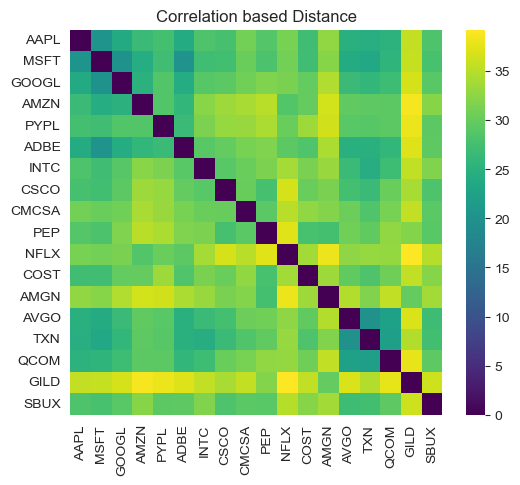

In [8]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    dist, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation based Distance')

#### Jensen-Shannon Divergence

$$
D_{KL}(P||Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

In [9]:
from scipy.special import rel_entr
from scipy.stats import gaussian_kde

def _js_divergence(x, y) :
    kde1, kde2 = gaussian_kde(x), gaussian_kde(y)
    estimate = np.linspace(
        min(np.min(x), np.min(y)), 
        max(np.max(x), np.max(y)), 
        len(x)
    )
    pdf1, pdf2 = kde1(estimate), kde2(estimate)
    m = 0.5 * (pdf1 + pdf2)
    return 0.5 * np.sum(rel_entr(pdf1, m)) + 0.5 * np.sum(rel_entr(pdf2, m))

def js_divergence(ret) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _js_divergence(ret.iloc[:,i], ret.iloc[:,j])
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [10]:
jsd = js_divergence(ret)
jsd

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.000000,9.007418,9.813306,18.202484,43.004912,11.885474,13.446250,46.242110,32.297127,177.874573,25.695554,83.175800,76.879053,9.692611,9.746067,34.827989,66.311286,17.819527
MSFT,9.007418,0.000000,7.399254,22.313116,53.481391,18.604807,17.971055,33.642287,22.914650,139.355040,31.359789,56.298296,54.644844,13.336571,7.433669,45.212536,45.455059,12.366194
GOOGL,9.813306,7.399254,0.000000,17.236658,42.583754,13.806787,11.604333,46.291980,35.397526,174.009129,23.835038,83.248768,84.367480,9.835470,8.655805,37.052325,65.067986,15.757498
AMZN,18.202484,22.313116,17.236658,0.000000,17.275392,10.791331,8.140582,80.573882,55.946059,227.307053,11.171627,121.008531,110.028708,7.942016,20.199818,10.605200,95.672761,35.010565
PYPL,43.004912,53.481391,42.583754,17.275392,0.000000,21.945744,17.078292,116.207052,90.505561,244.170676,7.141746,153.765678,143.714965,26.045192,47.216567,6.740638,131.572971,67.880121
ADBE,11.885474,18.604807,13.806787,10.791331,21.945744,0.000000,8.796417,69.317134,49.024523,187.051580,14.071978,100.832831,93.533666,9.808710,19.066298,14.991882,85.852535,32.611888
INTC,13.446250,17.971055,11.604333,8.140582,17.078292,8.796417,0.000000,57.656265,41.171431,160.585969,10.274723,84.843970,79.378411,6.925423,14.574635,12.463246,70.278345,26.859407
CSCO,46.242110,33.642287,46.291980,80.573882,116.207052,69.317134,57.656265,0.000000,18.742653,58.579530,73.910057,21.136522,17.747996,50.506389,42.972114,113.827917,15.054588,19.742191
CMCSA,32.297127,22.914650,35.397526,55.946059,90.505561,49.024523,41.171431,18.742653,0.000000,94.368251,55.799615,26.889590,30.002986,37.384642,26.597834,86.685857,25.583365,10.837169
PEP,177.874573,139.355040,174.009129,227.307053,244.170676,187.051580,160.585969,58.579530,94.368251,0.000000,162.163319,34.217726,46.329760,154.629970,173.291458,271.186249,50.540310,91.872611


Text(0.5, 1.0, 'Jensen-Shannon Divergence')

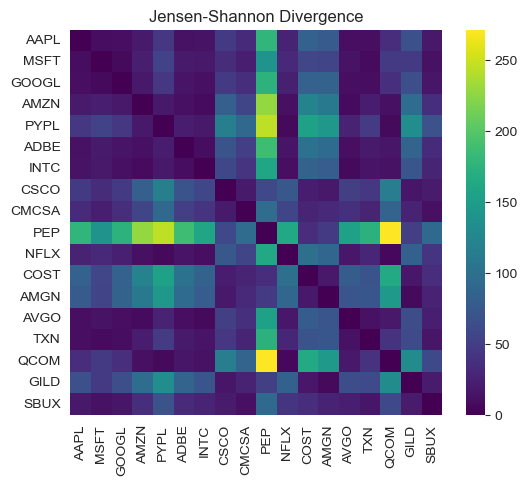

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    jsd, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Jensen-Shannon Divergence')

#### Variational Information

In [12]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

def num_bins(nObs, corr = None) :
    if corr is None :
        z = (8 + 324 * nObs + 12 * (36 * nObs + 729 * nObs ** 2) ** 0.5) ** (1/3)
        b = round(z / 6 + 2 / (3 * z) + 1 / 3)
    else :
        b = round(2 ** 0.5 * (1 + (1 + 24 * nObs * (1 - corr ** 2)) ** 0.5) ** 0.5)
    return int(b)

def _var_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
    hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
    v_xy = hx + hy - (2 * i_xy)
    if norm :
        h_xy = hx + hy - i_xy
        v_xy /= h_xy
    return v_xy

In [13]:
def var_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _var_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [14]:
vi = var_info(ret)
vi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,8.881784e-16,2.173189,2.650807e+00,2.618176e+00,2.741298e+00,2.486567e+00,2.663752e+00,2.632361e+00,2.932339e+00,2.557127e+00,2.575258e+00,2.670007e+00,3.134589e+00,2.450387e+00,2.597108e+00,2.644120,3.129781e+00,2.697302
MSFT,2.173189e+00,0.000000,2.198207e+00,2.383355e+00,2.556114e+00,1.963488e+00,2.457736e+00,2.435777e+00,2.796425e+00,2.352744e+00,2.389379e+00,2.525562e+00,2.854179e+00,2.194596e+00,2.381195e+00,2.521328,2.964766e+00,2.495502
GOOGL,2.650807e+00,2.198207,2.220446e-16,2.658467e+00,2.863898e+00,2.486026e+00,2.815973e+00,2.832282e+00,3.132535e+00,2.754012e+00,2.736714e+00,2.900030e+00,3.345061e+00,2.618344e+00,2.709020e+00,2.847331,3.316774e+00,2.817360
AMZN,2.618176e+00,2.383355,2.658467e+00,8.881784e-16,2.722928e+00,2.429168e+00,2.767725e+00,2.900079e+00,3.136657e+00,2.821628e+00,2.501558e+00,2.772040e+00,3.236016e+00,2.638859e+00,2.882524e+00,2.908897,3.180952e+00,2.760881
PYPL,2.741298e+00,2.556114,2.863898e+00,2.722928e+00,-2.220446e-16,2.417171e+00,2.675723e+00,2.729613e+00,2.973465e+00,2.684289e+00,2.427592e+00,2.802148e+00,3.127615e+00,2.537081e+00,2.757439e+00,2.793351,3.084856e+00,2.572387
ADBE,2.486567e+00,1.963488,2.486026e+00,2.429168e+00,2.417171e+00,4.440892e-16,2.555257e+00,2.542332e+00,2.809881e+00,2.449188e+00,2.327037e+00,2.591842e+00,3.020545e+00,2.242016e+00,2.458986e+00,2.567365,2.996812e+00,2.536258
INTC,2.663752e+00,2.457736,2.815973e+00,2.767725e+00,2.675723e+00,2.555257e+00,6.661338e-16,2.422317e+00,2.743281e+00,2.408426e+00,2.537383e+00,2.604946e+00,2.918086e+00,2.136827e+00,2.239591e+00,2.406484,2.899325e+00,2.528050
CSCO,2.632361e+00,2.435777,2.832282e+00,2.900079e+00,2.729613e+00,2.542332e+00,2.422317e+00,6.661338e-16,2.581272e+00,2.213752e+00,2.588044e+00,2.520203e+00,2.707702e+00,2.336384e+00,2.362284e+00,2.692362,2.795794e+00,2.424041
CMCSA,2.932339e+00,2.796425,3.132535e+00,3.136657e+00,2.973465e+00,2.809881e+00,2.743281e+00,2.581272e+00,2.220446e-16,2.499088e+00,2.786685e+00,2.898652e+00,2.953044e+00,2.680068e+00,2.856066e+00,3.032675,3.044206e+00,2.659268
PEP,2.557127e+00,2.352744,2.754012e+00,2.821628e+00,2.684289e+00,2.449188e+00,2.408426e+00,2.213752e+00,2.499088e+00,4.440892e-16,2.454932e+00,2.297990e+00,2.434751e+00,2.330369e+00,2.551239e+00,2.782475,2.418560e+00,2.269010


Text(0.5, 1.0, 'Variational Information')

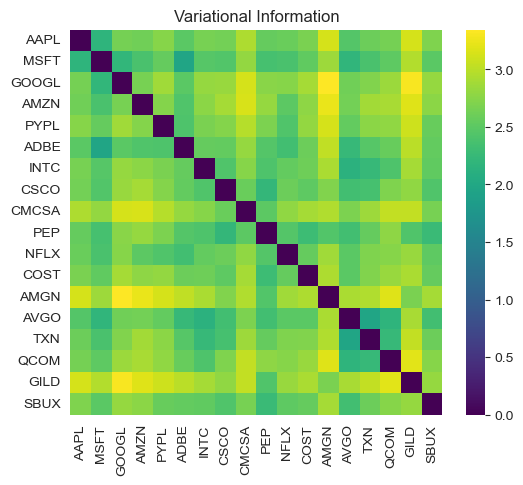

In [15]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    vi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Variational Information')

#### Mutual Information

In [16]:
def _mutual_info(x, y, norm = False) :
    b_xy = num_bins(len(x), np.corrcoef(x, y)[0,1])
    c_xy = np.histogram2d(x, y, bins = b_xy)[0]
    i_xy = mutual_info_score(None, None, contingency = c_xy)
    if norm :
        hx = ss.entropy(np.histogram(x, bins = b_xy)[0])
        hy = ss.entropy(np.histogram(y, bins = b_xy)[0])
        i_xy /= (hx + hy)
    return i_xy

def mutual_info(ret, norm = False) :
    n = len(ret.columns)
    dist = np.zeros((n,n))
    for i in range(n) :
        for j in range(n) :
            dist[i,j] = _mutual_info(ret.iloc[:,i], ret.iloc[:,j], norm)
    dist = pd.DataFrame(dist, columns = ret.columns, index = ret.columns)
    return dist

In [17]:
mi = mutual_info(ret)
mi

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
AAPL,0.656498,0.405695,0.394436,0.338298,0.274323,0.308534,0.246238,0.238649,0.215218,0.172135,0.200898,0.256966,0.159124,0.288233,0.307767,0.339871,0.129322,0.204488
MSFT,0.405695,0.675263,0.475533,0.357682,0.278267,0.420271,0.260598,0.248293,0.194527,0.185678,0.205189,0.240540,0.154061,0.318101,0.317696,0.303239,0.116439,0.216739
GOOGL,0.394436,0.475533,0.533949,0.392961,0.295365,0.383613,0.252469,0.221031,0.197462,0.156034,0.202512,0.224296,0.136659,0.279063,0.326619,0.313074,0.118597,0.226800
AMZN,0.338298,0.357682,0.392961,0.681139,0.286549,0.339589,0.197292,0.164904,0.177560,0.118175,0.240789,0.208990,0.115971,0.242808,0.241210,0.268019,0.111297,0.175739
PYPL,0.274323,0.278267,0.295365,0.286549,0.148042,0.279043,0.185158,0.179125,0.188144,0.115833,0.219636,0.177764,0.099159,0.235562,0.245617,0.267657,0.088333,0.211851
ADBE,0.308534,0.420271,0.383613,0.339589,0.279043,0.684213,0.208083,0.191262,0.184045,0.133702,0.232606,0.203646,0.122437,0.299205,0.283614,0.285035,0.102098,0.192607
INTC,0.246238,0.260598,0.252469,0.197292,0.185158,0.208083,0.643148,0.221719,0.187795,0.124533,0.151869,0.167544,0.137578,0.315926,0.357438,0.329602,0.114753,0.167161
CSCO,0.238649,0.248293,0.221031,0.164904,0.179125,0.191262,0.221719,0.685578,0.245515,0.198586,0.107385,0.186632,0.170711,0.245769,0.271364,0.228010,0.147364,0.195882
CMCSA,0.215218,0.194527,0.197462,0.177560,0.188144,0.184045,0.187795,0.245515,0.374704,0.182476,0.139010,0.174958,0.174598,0.200484,0.232720,0.184411,0.154104,0.204826
PEP,0.172135,0.185678,0.156034,0.118175,0.115833,0.133702,0.124533,0.198586,0.182476,0.535252,0.087987,0.193606,0.203055,0.144644,0.154443,0.143999,0.173769,0.169265


Text(0.5, 1.0, 'Mutual Information')

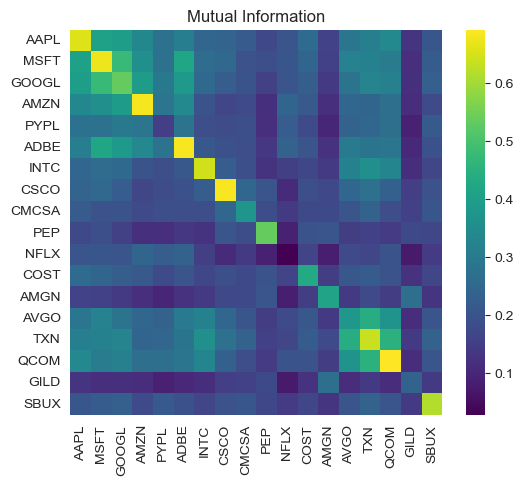

In [18]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    mi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Mutual Information')

In [19]:
from scipy.optimize import minimize

def markowitz_optimization(returns, distance_matrix, target_return):
    n = distance_matrix.shape[0]
    initial_weights = np.ones(n) / n

    def portfolio_risk(weights):
        weighted_distance = np.dot(weights.T, np.dot(distance_matrix, weights))
        return np.sqrt(weighted_distance)

    def target_return_constraint(weights):
        return target_return - np.dot(weights, returns)

    def weight_sum_constraint(weights):
        return np.sum(weights) - 1

    constraints = [{'type': 'eq', 'fun': weight_sum_constraint},
                   {'type': 'eq', 'fun': target_return_constraint}]

    bounds = tuple((0, 1) for _ in range(n))

    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    result = pd.Series(result.x, index = returns.index)

    return result

In [20]:
def generate_random_portfolios(returns, distance_matrix, num_portfolios=5000):
    n = returns.shape[1]  
    mean_returns = returns.mean()  
    portfolio_returns = []
    portfolio_volatility = []
    for _ in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_returns.append(portfolio_return)
        
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        portfolio_volatility.append(portfolio_std)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatility
    })
    
    return portfolios

def find_optimal_portfolio(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def neg_sharpe_ratio(weights):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        return -sharpe_ratio 

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index = returns.columns, name = 'weight')
    optimal_return = np.dot(optimal_weights, mean_returns)
    return optimal_weights, optimal_return

In [21]:
portfolio_mi = generate_random_portfolios(ret, mi, num_portfolios = 5000)
optimal_weight_mi, optimal_return_mi = find_optimal_portfolio(ret, mi)

In [22]:
optimal_return_mi

0.001126343247257021

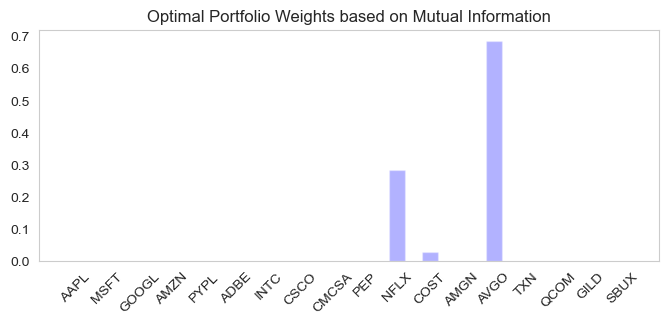

In [23]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_mi.index, optimal_weight_mi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Mutual Information')
plt.show()

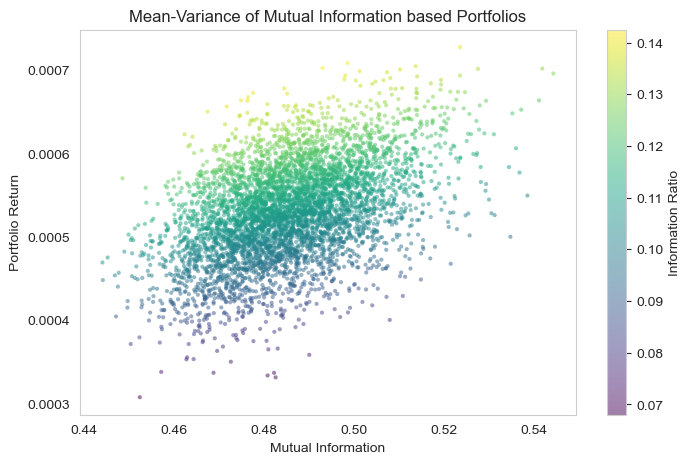

In [24]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_mi['Volatility'], 
    portfolio_mi['Return'], 
    c = (portfolio_mi['Return'] / portfolio_mi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Mutual Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Mutual Information based Portfolios')
plt.show()

In [25]:
portfolio_vi = generate_random_portfolios(ret, vi, num_portfolios = 5000)
optimal_weight_vi, optimal_return_vi = find_optimal_portfolio(ret, vi)

In [26]:
optimal_return_vi

0.0012858958006619718

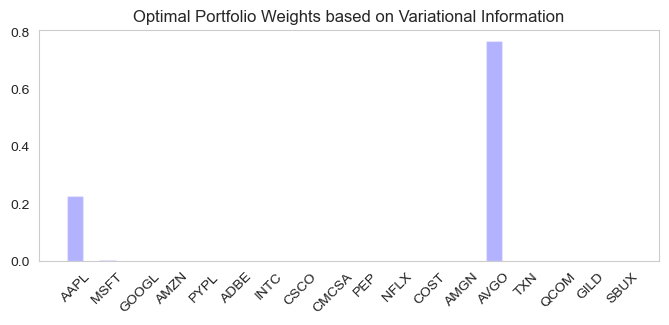

In [27]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_vi.index, optimal_weight_vi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Variational Information')
plt.show()

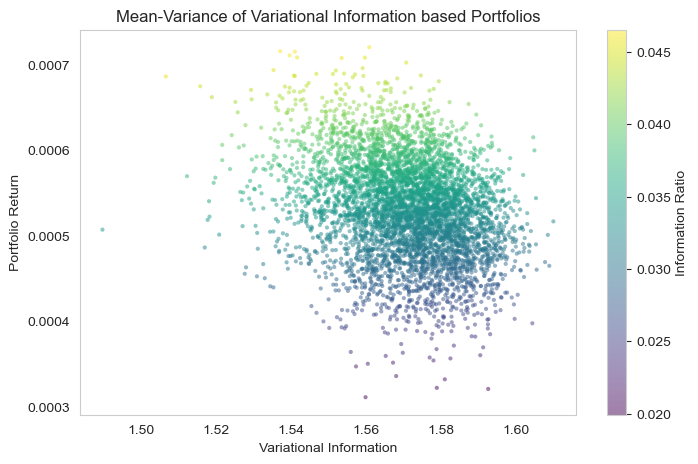

In [28]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_vi['Volatility'], 
    portfolio_vi['Return'], 
    c = (portfolio_vi['Return'] / portfolio_vi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Variational Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Variational Information based Portfolios')
plt.show()

In [29]:
portfolio_jsd = generate_random_portfolios(ret, jsd, num_portfolios = 5000)
optimal_weight_jsd, optimal_return_jsd = find_optimal_portfolio(ret, jsd)

In [30]:
optimal_return_jsd

0.0005299581578727552

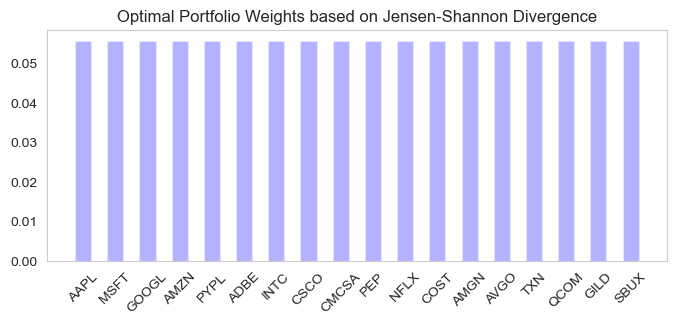

In [31]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_jsd.index, optimal_weight_jsd, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

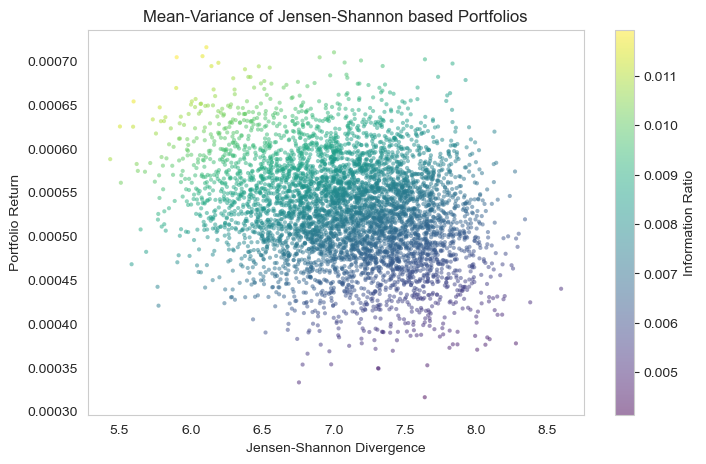

In [32]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_jsd['Volatility'], 
    portfolio_jsd['Return'], 
    c = (portfolio_jsd['Return'] / portfolio_jsd['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Jensen-Shannon based Portfolios')
plt.show()

In [33]:
portfolio_corr_dist = generate_random_portfolios(ret, dist, num_portfolios = 5000)

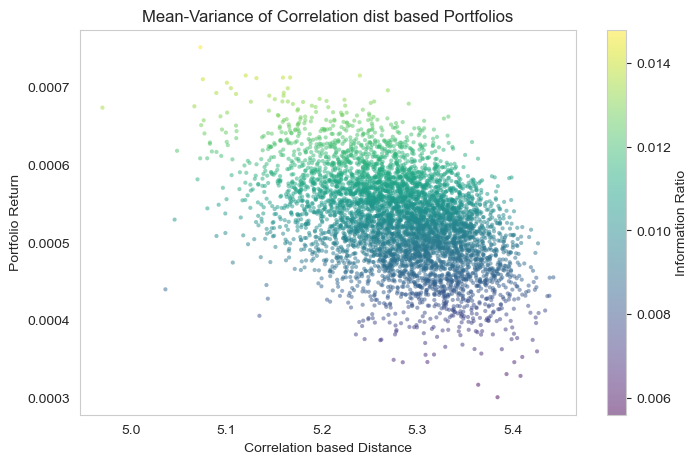

In [34]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr_dist['Volatility'], 
    portfolio_corr_dist['Return'], 
    c = (portfolio_corr_dist['Return'] / portfolio_corr_dist['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation based Distance')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation dist based Portfolios')
plt.show()

In [35]:
portfolio_corr = generate_random_portfolios(ret, ret.corr(), num_portfolios = 5000)
optimal_weight_corr_dist, optimal_return_corr_dist = find_optimal_portfolio(ret, ret.corr())

In [36]:
optimal_return_corr_dist

0.0011066169196013154

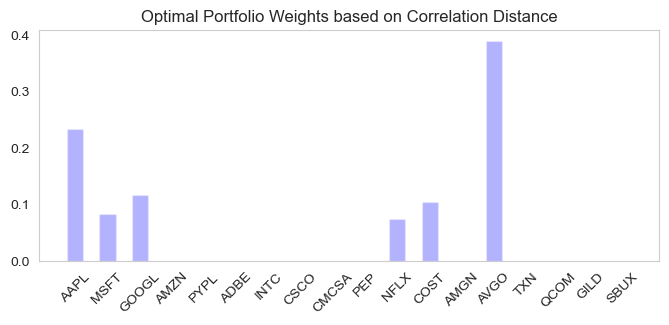

In [37]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_corr_dist.index, optimal_weight_corr_dist, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Correlation Distance')
plt.show()

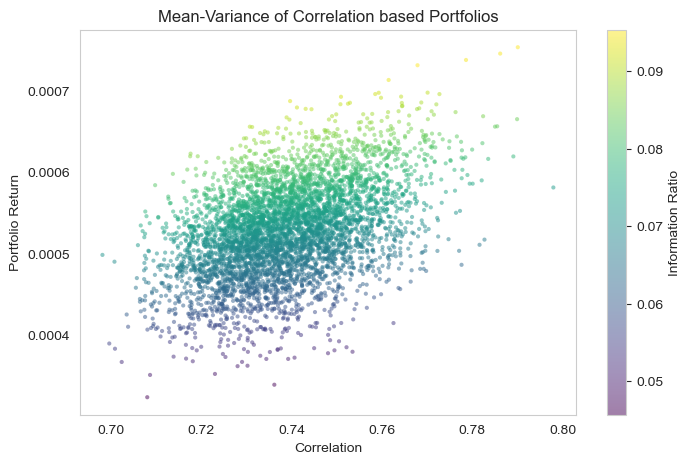

In [38]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr['Volatility'], 
    portfolio_corr['Return'], 
    c = (portfolio_corr['Return'] / portfolio_corr['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation based Portfolios')
plt.show()

In [39]:
return_comparison = [optimal_return_corr_dist, optimal_return_jsd, optimal_return_vi, optimal_return_mi]
weight_comparison = pd.DataFrame(
    [optimal_weight_corr_dist, optimal_weight_jsd, optimal_weight_vi, optimal_weight_mi], 
    index = ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']
)

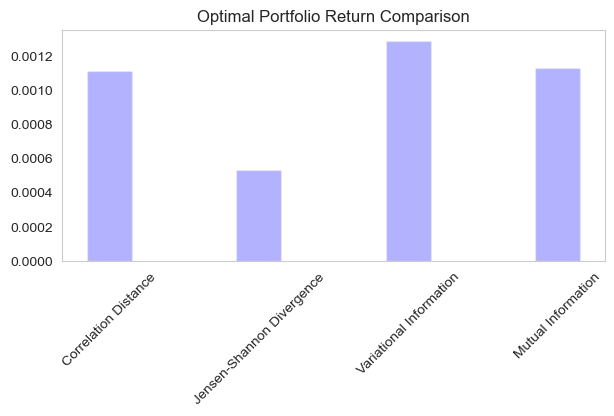

In [40]:
plt.figure(figsize = (7, 3))
plt.bar(
    ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'], 
    return_comparison, 
    color = 'b', 
    alpha = 0.3, 
    label = 'Optimal Portfolio', 
    width = 0.3
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Return Comparison')
plt.show()

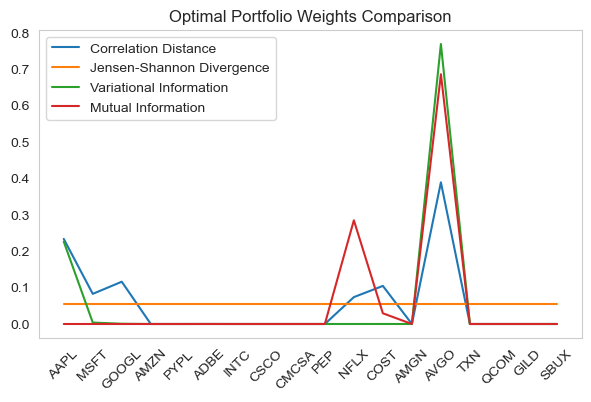

In [41]:
plt.figure(figsize = (7, 4))
plt.plot(
    weight_comparison.T
)
plt.legend([
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
])
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights Comparison')
plt.show()

#### Backtesting

In [47]:
import quantstats as qs

In [48]:
backtest = pd.DataFrame()
backtest = pd.concat(
    [
        backtest, 
        (ret_test * optimal_weight_corr_dist).sum(axis = 1),
        (ret_test * optimal_weight_jsd).sum(axis = 1),
        (ret_test * optimal_weight_vi).sum(axis = 1),
        (ret_test * optimal_weight_mi).sum(axis = 1)
    ], axis = 1
)
backtest.columns = [
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
]

In [51]:
backtest.index = pd.to_datetime(backtest.index)

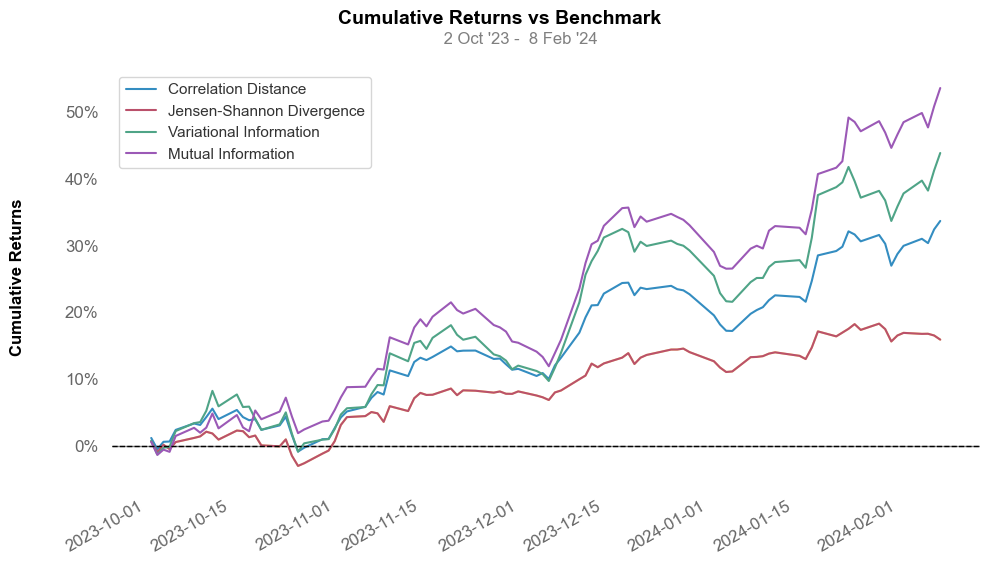

In [59]:
plt.rcParams["axes.grid"] = False  # 모든 플롯에 대해 그리드 비활성화
qs.plots.returns(
    backtest,
    benchmark = ret_test.mean(axis = 1),
)

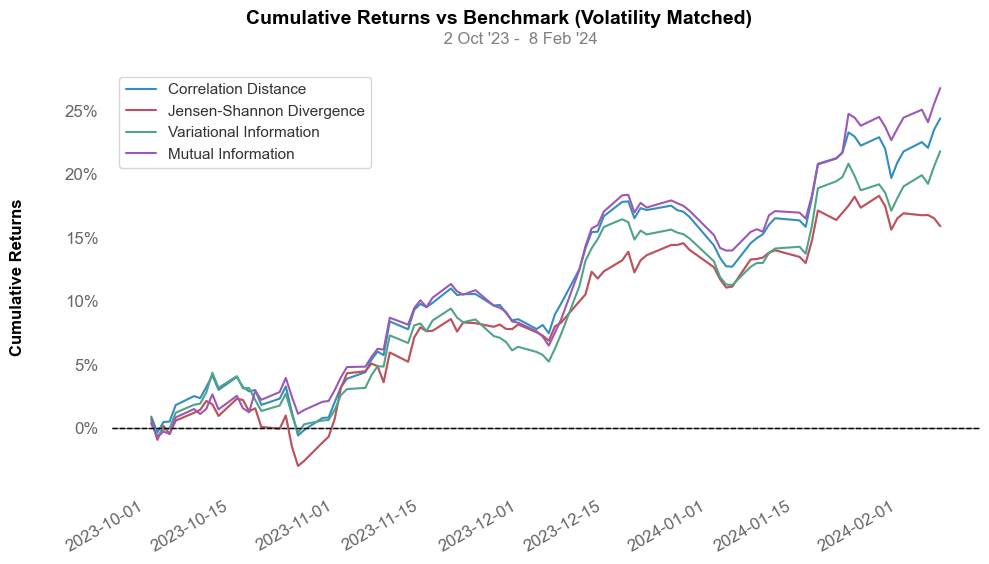

In [58]:
qs.plots.returns(
    backtest[['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']],
    benchmark = ret_test.mean(axis = 1),
    match_volatility = True
)

In [60]:
qs.reports.metrics(backtest, benchmark = ret_test.mean(axis = 1))

                    Benchmark    Correlation Distance    Jensen-Shannon Divergence    Variational Information    Mutual Information
------------------  -----------  ----------------------  ---------------------------  -------------------------  --------------------
Start Period        2023-10-02   2023-10-02              2023-10-02                   2023-10-02                 2023-10-02
End Period          2024-02-08   2024-02-08              2024-02-08                   2024-02-08                 2024-02-08
Risk-Free Rate      0.0%         0.0%                    0.0%                         0.0%                       0.0%
Time in Market      100.0%       100.0%                  100.0%                       100.0%                     100.0%

Cumulative Return   15.91%       33.68%                  15.91%                       43.86%                     53.59%
CAGR﹪              33.42%       76.3%                   33.42%                       103.48%                    131.24%

Sharpe

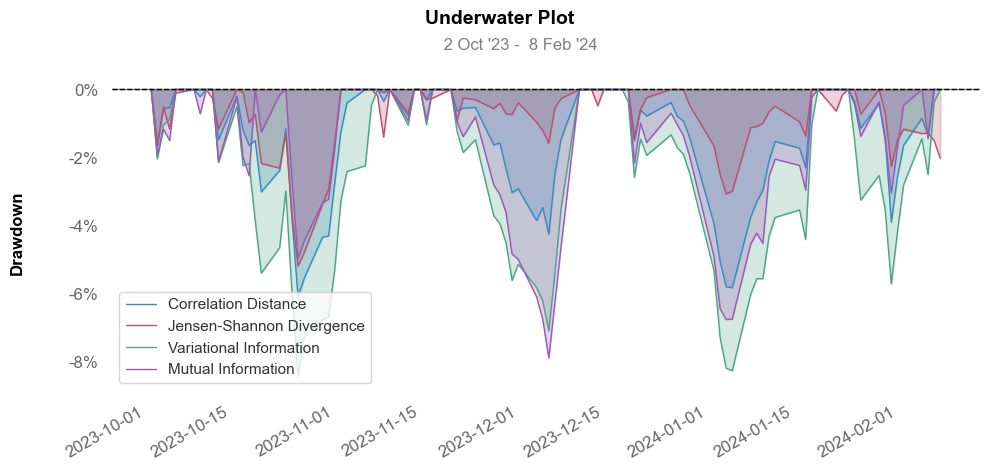

In [64]:
qs.plots.drawdown(backtest)